In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"negarmansouri96","key":"dff6cfe0d2006e749b7c718a13c89eef"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d mkashifn/nbaiot-dataset

Dataset URL: https://www.kaggle.com/datasets/mkashifn/nbaiot-dataset
License(s): unknown
100% 1.75G/1.75G [01:06<00:00, 30.4MB/s]
100% 1.75G/1.75G [01:06<00:00, 28.3MB/s]


In [6]:
import zipfile
import os
import pandas as pd
import re

In [7]:
zip_file_path = "/content/nbaiot-dataset.zip"

In [8]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

In [9]:
os.remove("/content/extracted_files/README.md")
os.remove("/content/extracted_files/data_summary.csv")
os.remove("/content/extracted_files/device_info.csv")
os.remove("/content/extracted_files/features.csv")

In [10]:
csv_files = [f for f in os.listdir('extracted_files') if f.endswith('.csv')]

n_bootstrap_samples = 10000

bootstrapped_dfs = []

def clean_label(file_name):
    label = re.sub(r'^\d+\.', '', file_name)
    return label

for file in csv_files:
    df = pd.read_csv(os.path.join('extracted_files', file))

    bootstrap_sample = df.sample(n=n_bootstrap_samples, replace=True, random_state=42)

    label = clean_label(file.replace('.csv', ''))
    bootstrap_sample['label'] = label

    bootstrapped_dfs.append(bootstrap_sample)

final_df = pd.concat(bootstrapped_dfs, ignore_index=True)

final_df.head(), final_df.shape


(   MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
 0         46.057494      111.870813        30149.370567         66.814927   
 1         74.050818       74.081260            1.943644        107.500992   
 2         65.736849       74.043668            1.046166        103.941844   
 3         36.107501       74.290441            7.006968         71.177269   
 4         72.482031       78.201074         1662.947263        107.402751   
 
    MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
 0      113.755084        31537.712719        132.575441      104.789576   
 1       74.107170            2.563005        191.323287       74.230663   
 2       74.072172            1.756025        265.846235       74.188862   
 3       74.241736           10.527788        216.507299       74.637665   
 4       77.741694         1476.940827        196.392790       77.152016   
 
    MI_dir_L1_variance  MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  \

In [11]:
final_df.shape

(890000, 116)

In [12]:
print(final_df.describe())

       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
count     890000.000000   890000.000000        8.900000e+05     890000.000000   
mean          82.711181      149.464909        1.113414e+04        130.420913   
std           69.817216      146.326988        2.141338e+04        111.799230   
min            1.000000       60.000000        0.000000e+00          1.000000   
25%            1.032207       60.000012        2.730000e-12          1.142749   
50%           83.993724       74.026481        1.952117e+00        124.046726   
75%          148.167723      189.531314        5.535726e+03        239.362337   
max          438.002839     1452.530931        4.917524e+05        556.679217   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
count   890000.000000        8.900000e+05     890000.000000   890000.000000   
mean       149.658782        1.236716e+04        366.220777      150.125097   
std        142.163694        2.25

In [13]:
print("Unique values in the 'label' column:", final_df['label'].unique())


Unique values in the 'label' column: ['gafgyt.scan' 'benign' 'mirai.udpplain' 'mirai.syn' 'mirai.udp'
 'mirai.scan' 'gafgyt.combo' 'gafgyt.udp' 'gafgyt.junk' 'mirai.ack'
 'gafgyt.tcp']


In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

final_df['label_encoded'] = label_encoder.fit_transform(final_df['label'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding map:", label_mapping)

print(final_df[['label', 'label_encoded']].head())


Label encoding map: {'benign': 0, 'gafgyt.combo': 1, 'gafgyt.junk': 2, 'gafgyt.scan': 3, 'gafgyt.tcp': 4, 'gafgyt.udp': 5, 'mirai.ack': 6, 'mirai.scan': 7, 'mirai.syn': 8, 'mirai.udp': 9, 'mirai.udpplain': 10}
         label  label_encoded
0  gafgyt.scan              3
1  gafgyt.scan              3
2  gafgyt.scan              3
3  gafgyt.scan              3
4  gafgyt.scan              3


In [15]:
final_df.shape

(890000, 117)

In [16]:
label_columns = [col for col in final_df.columns if 'label' in col]
print("Columns containing 'label':", label_columns)


Columns containing 'label': ['label', 'label_encoded']


Using device: cuda
Model Architecture:
PaperDNN(
  (model): Sequential(
    (0): Linear(in_features=115, out_features=115, bias=True)
    (1): Tanh()
    (2): Linear(in_features=115, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): Tanh()
    (6): Linear(in_features=32, out_features=11, bias=True)
    (7): Softmax(dim=1)
  )
)
Total Parameters: 23207


Training Epochs:   3%|▎         | 1/30 [00:54<26:20, 54.50s/it]

Epoch 1/30, Train Loss: 1.7673, Val Loss: 1.7393, Val Acc: 80.84%


Training Epochs:   7%|▋         | 2/30 [01:54<27:03, 57.99s/it]

Epoch 2/30, Train Loss: 1.7396, Val Loss: 1.7299, Val Acc: 81.69%


Training Epochs:  10%|█         | 3/30 [02:55<26:31, 58.96s/it]

Epoch 3/30, Train Loss: 1.7294, Val Loss: 1.7217, Val Acc: 82.34%


Training Epochs:  13%|█▎        | 4/30 [04:00<26:37, 61.44s/it]

Epoch 4/30, Train Loss: 1.7242, Val Loss: 1.7329, Val Acc: 81.28%


Training Epochs:  17%|█▋        | 5/30 [05:05<26:11, 62.88s/it]

Epoch 5/30, Train Loss: 1.7185, Val Loss: 1.7029, Val Acc: 84.50%


Training Epochs:  20%|██        | 6/30 [06:11<25:29, 63.72s/it]

Epoch 6/30, Train Loss: 1.6879, Val Loss: 1.6820, Val Acc: 86.40%


Training Epochs:  23%|██▎       | 7/30 [07:18<24:53, 64.95s/it]

Epoch 7/30, Train Loss: 1.6828, Val Loss: 1.6898, Val Acc: 85.56%


Training Epochs:  27%|██▋       | 8/30 [08:15<22:53, 62.42s/it]

Epoch 8/30, Train Loss: 1.6782, Val Loss: 1.6775, Val Acc: 86.82%


Training Epochs:  30%|███       | 9/30 [09:08<20:45, 59.33s/it]

Epoch 9/30, Train Loss: 1.6770, Val Loss: 1.6743, Val Acc: 87.12%


Training Epochs:  33%|███▎      | 10/30 [10:12<20:19, 60.99s/it]

Epoch 10/30, Train Loss: 1.6735, Val Loss: 1.6900, Val Acc: 85.50%


Training Epochs:  37%|███▋      | 11/30 [11:17<19:40, 62.12s/it]

Epoch 11/30, Train Loss: 1.6683, Val Loss: 1.6688, Val Acc: 87.73%


Training Epochs:  40%|████      | 12/30 [12:22<18:52, 62.93s/it]

Epoch 12/30, Train Loss: 1.6626, Val Loss: 1.6610, Val Acc: 88.36%


Training Epochs:  43%|████▎     | 13/30 [13:27<18:04, 63.77s/it]

Epoch 13/30, Train Loss: 1.6613, Val Loss: 1.6641, Val Acc: 88.07%


Training Epochs:  47%|████▋     | 14/30 [14:33<17:10, 64.43s/it]

Epoch 14/30, Train Loss: 1.6603, Val Loss: 1.6609, Val Acc: 88.31%


Training Epochs:  50%|█████     | 15/30 [15:39<16:10, 64.71s/it]

Epoch 15/30, Train Loss: 1.6595, Val Loss: 1.6596, Val Acc: 88.74%


Training Epochs:  53%|█████▎    | 16/30 [16:43<15:02, 64.43s/it]

Epoch 16/30, Train Loss: 1.6589, Val Loss: 1.6584, Val Acc: 88.61%


Training Epochs:  57%|█████▋    | 17/30 [17:42<13:38, 62.96s/it]

Epoch 17/30, Train Loss: 1.6583, Val Loss: 1.6580, Val Acc: 88.65%


Training Epochs:  60%|██████    | 18/30 [18:49<12:49, 64.09s/it]

Epoch 18/30, Train Loss: 1.6579, Val Loss: 1.6577, Val Acc: 88.78%


Training Epochs:  63%|██████▎   | 19/30 [19:55<11:52, 64.75s/it]

Epoch 19/30, Train Loss: 1.6576, Val Loss: 1.6576, Val Acc: 88.70%


Training Epochs:  67%|██████▋   | 20/30 [21:01<10:49, 64.97s/it]

Epoch 20/30, Train Loss: 1.6575, Val Loss: 1.6574, Val Acc: 88.74%


Training Epochs:  67%|██████▋   | 20/30 [22:05<11:02, 66.29s/it]

Epoch 21/30, Train Loss: 1.6575, Val Loss: 1.6574, Val Acc: 88.74%
Early stopping triggered.


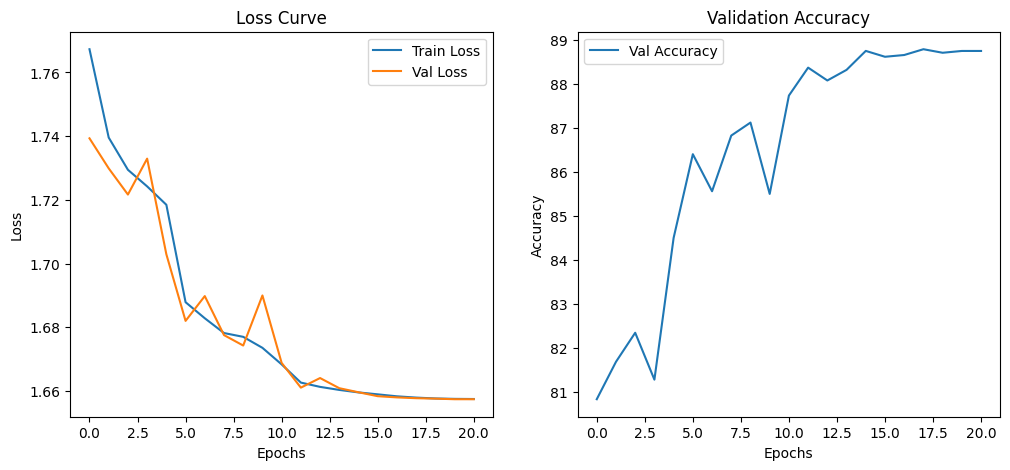

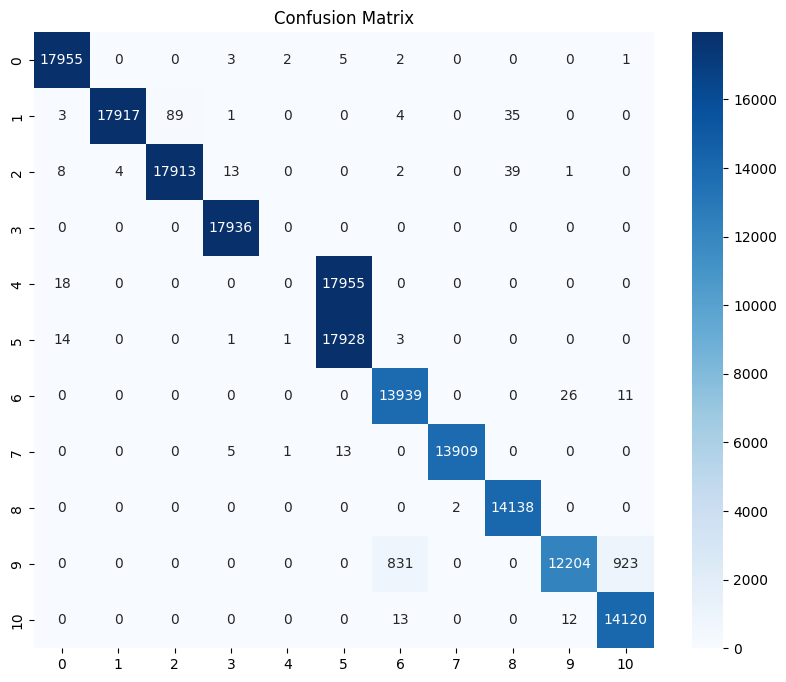

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17968
           1       1.00      0.99      1.00     18049
           2       1.00      1.00      1.00     17980
           3       1.00      1.00      1.00     17936
           4       0.00      0.00      0.00     17973
           5       0.50      1.00      0.67     17947
           6       0.94      1.00      0.97     13976
           7       1.00      1.00      1.00     13928
           8       0.99      1.00      1.00     14140
           9       1.00      0.87      0.93     13958
          10       0.94      1.00      0.97     14145

    accuracy                           0.89    178000
   macro avg       0.85      0.90      0.87    178000
weighted avg       0.84      0.89      0.85    178000



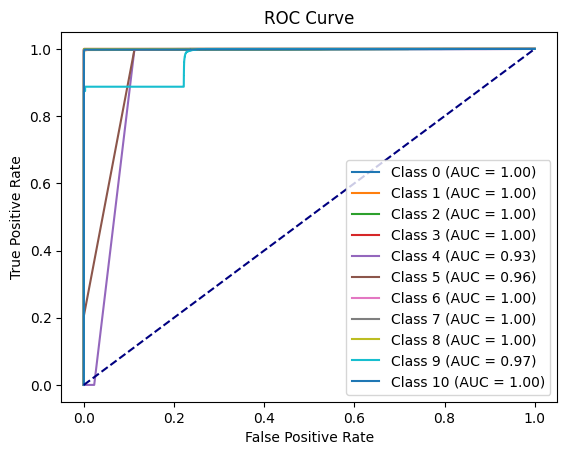

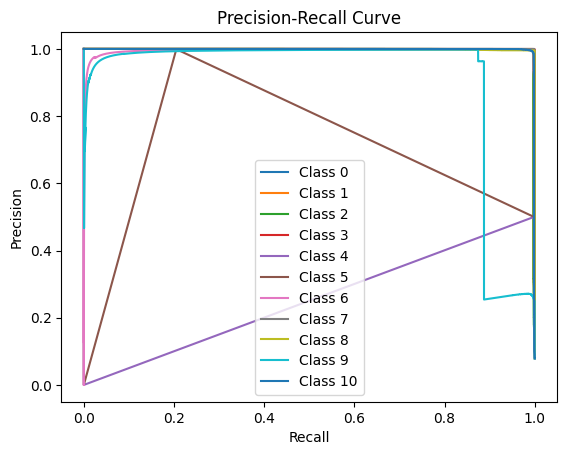

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

X = final_df.drop(columns=["label", "label_encoded", "binary_label"]).values  # Features
y = final_df["label_encoded"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class PaperDNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PaperDNN, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim

        self.model = nn.Sequential(
            nn.Linear(input_dim, 115),  # Layer 1
            nn.Tanh(),
            nn.Linear(115, 64),  # Layer 2
            nn.Tanh(),
            nn.Linear(64, 32),  # Layer 3
            nn.Tanh(),
            nn.Linear(32, output_dim),  # Output Layer
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)

input_dim = X_tensor.shape[1]
output_dim = len(np.unique(y))  # Number of classes
model = PaperDNN(input_dim=input_dim, output_dim=output_dim).to(device)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Model Architecture:")
print(model)
print(f"Total Parameters: {count_parameters(model)}")

l1_lambda = 1e-5  # L1 regularization strength
criterion = nn.CrossEntropyLoss()

def custom_loss(output, target, model, l1_lambda):
    ce_loss = criterion(output, target)  # Cross-Entropy Loss
    l1_loss = sum(torch.sum(torch.abs(param)) for param in model.parameters())
    return ce_loss + l1_lambda * l1_loss

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

class EarlyStopping:
    def __init__(self, patience=5, delta=0.001):
        self.patience = patience
        self.delta = delta
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

early_stopping = EarlyStopping(patience=5)

def train_model(model, train_loader, val_loader, num_epochs=30):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in tqdm(range(num_epochs), desc="Training Epochs"):
        model.train()
        train_loss = 0.0
        for features, labels in train_loader:
            features, labels = features.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(features)
            loss = custom_loss(outputs, labels, model, l1_lambda)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        val_loss, val_accuracy = evaluate_model(model, val_loader, return_loss=True)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        scheduler.step()

        early_stopping(val_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break

    return train_losses, val_losses, val_accuracies

def evaluate_model(model, loader, return_loss=False):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            loss = custom_loss(outputs, labels, model, l1_lambda)
            total_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += preds.eq(labels).sum().item()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = 100. * correct / total
    total_loss /= len(loader)

    if return_loss:
        return total_loss, accuracy

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(output_dim), yticklabels=range(output_dim))
    plt.title('Confusion Matrix')
    plt.show()

    print(classification_report(all_labels, all_preds))

    return accuracy

def plot_curves(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            probs = nn.functional.softmax(outputs, dim=1)
            all_preds.append(probs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    for i in range(output_dim):
        fpr, tpr, _ = roc_curve(all_labels == i, all_preds[:, i])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Precision-Recall Curve for each class
    for i in range(output_dim):
        precision, recall, _ = precision_recall_curve(all_labels == i, all_preds[:, i])
        plt.plot(recall, precision, label=f'Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

num_epochs = 30
train_losses, val_losses, val_accuracies = train_model(model, train_loader, test_loader, num_epochs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.show()

evaluate_model(model, test_loader)

plot_curves(model, test_loader)
